In [1]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# version check
import sounddevice as sd
import wavio as wv
import sklearn

In [3]:
print(librosa.__version__)
print(np.__version__)
print(pd.__version__)
print(sd.__version__)
print(wv.__version__)
print(sklearn.__version__)

0.9.1
1.20.3
1.3.4
0.4.1
0.0.4
0.24.2


# Load dataset

In [124]:
big_fast_path = "./dataset/big_fast/"
big_slow_path = "./dataset/big_slow/"

fast_example = big_fast_path+os.listdir(big_fast_path)[6]
slow_example = big_slow_path+os.listdir(big_slow_path)[8]

In [133]:
# example path
fast_example

'./dataset/big_fast/2022-05-14_06-19-30.wav'

In [126]:
y_fast, sr_fast = librosa.load(fast_example)
y_slow, sr_slow = librosa.load(slow_example)

# Feature Extraction

In [127]:
# get mfcc dataset each speed sound
fast_mfccs = librosa.feature.mfcc(y=y_fast, sr=sr_fast)
slow_mfccs = librosa.feature.mfcc(y=y_slow, sr=sr_slow)

In [128]:
# get melspectogram each speed sound
fast_S = librosa.feature.melspectrogram(y=y_fast, sr=sr_fast, n_mels=128, fmax=8000)
slow_S = librosa.feature.melspectrogram(y=y_slow, sr=sr_slow, n_mels=128, fmax=8000)

[Text(0.5, 1.0, 'MFCC')]

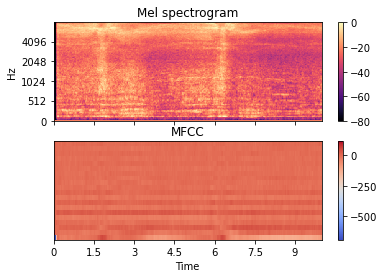

In [134]:
# show fast sound image
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(fast_S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(fast_mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

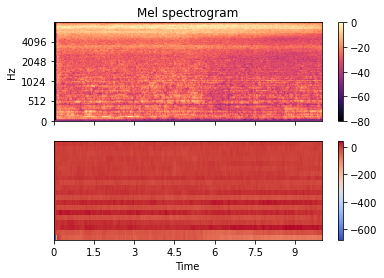

In [135]:
# show slow sound image
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(slow_S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(slow_mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
# ax[1].set(title='MFCC')

[Text(0.5, 1.0, 'MFCC')]

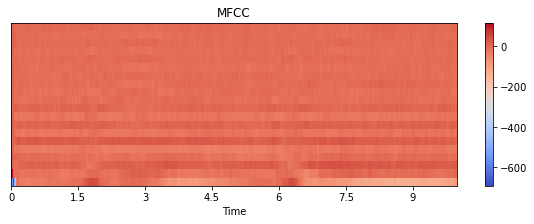

In [136]:
# only shows fast MFCC
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 3))
img = librosa.display.specshow(fast_mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='MFCC')

[Text(0.5, 1.0, 'MFCC')]

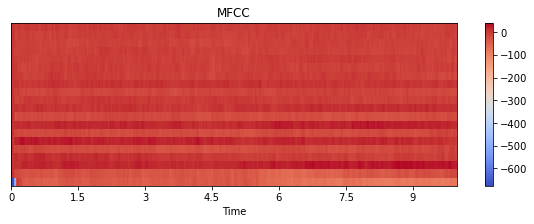

In [137]:
# only shows slow MFCC
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10, 3))
img = librosa.display.specshow(slow_mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='MFCC')

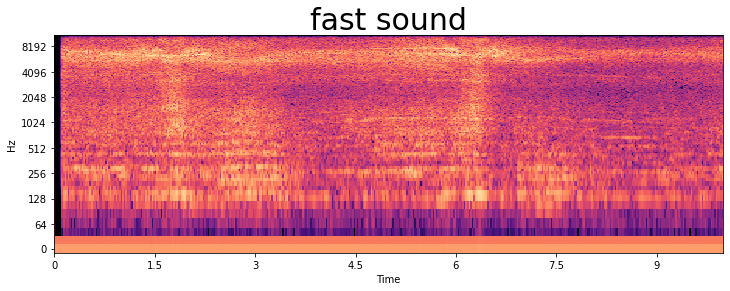

In [138]:
# show spectrum of fast sound
# x, sr = librosa.load('audio/00020_2003_person1.wav', sr=None)

window_size = 1024
hop_length = 512 
n_mels = 128
time_steps = 384 

window = np.hanning(window_size)
stft= librosa.core.spectrum.stft(y_fast, n_fft = window_size, hop_length = hop_length, window=window)
out = 2 * np.abs(stft) / np.sum(window)

plt.figure(figsize=(12, 4))
ax1 = plt.axes()
plt.title("fast sound", fontsize=30)
plt.set_cmap('hot')
librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), y_axis='log', x_axis='time',sr=sr_fast)
# plt.savefig('spectrogramA.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )

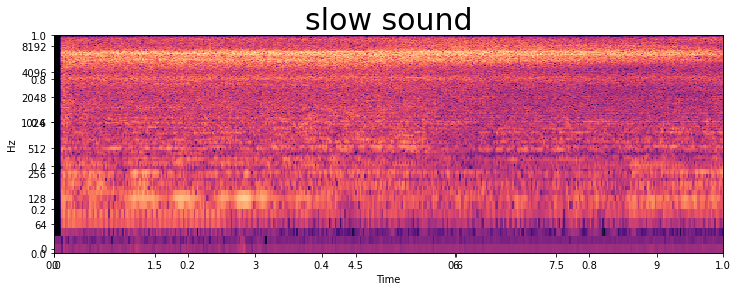

In [139]:
# show spectrum of slow sound
# x, sr = librosa.load('audio/00020_2003_person1.wav', sr=None)

window_size = 1024
hop_length = 512 
n_mels = 128
time_steps = 384 

window = np.hanning(window_size)
stft= librosa.core.spectrum.stft(y_slow, n_fft = window_size, hop_length = hop_length, window=window)
out = 2 * np.abs(stft) / np.sum(window)

plt.figure(figsize=(12, 4))
plt.title("slow sound", fontsize=30)
ax2 = plt.axes()
plt.set_cmap('hot')
librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), y_axis='log', x_axis='time',sr=sr_slow)
# plt.savefig('spectrogramA.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )